# Bar Code 

Bar graphs for each protein used in the MRM method with statistical error between replicates for each treatment.

# VIMENTINA
Vimentins are class-III intermediate filaments found in various non-epithelial cells, especially mesenchymal cells. Vimentin is attached to the nucleus, endoplasmic reticulum, and mitochondria, either laterally or terminally.

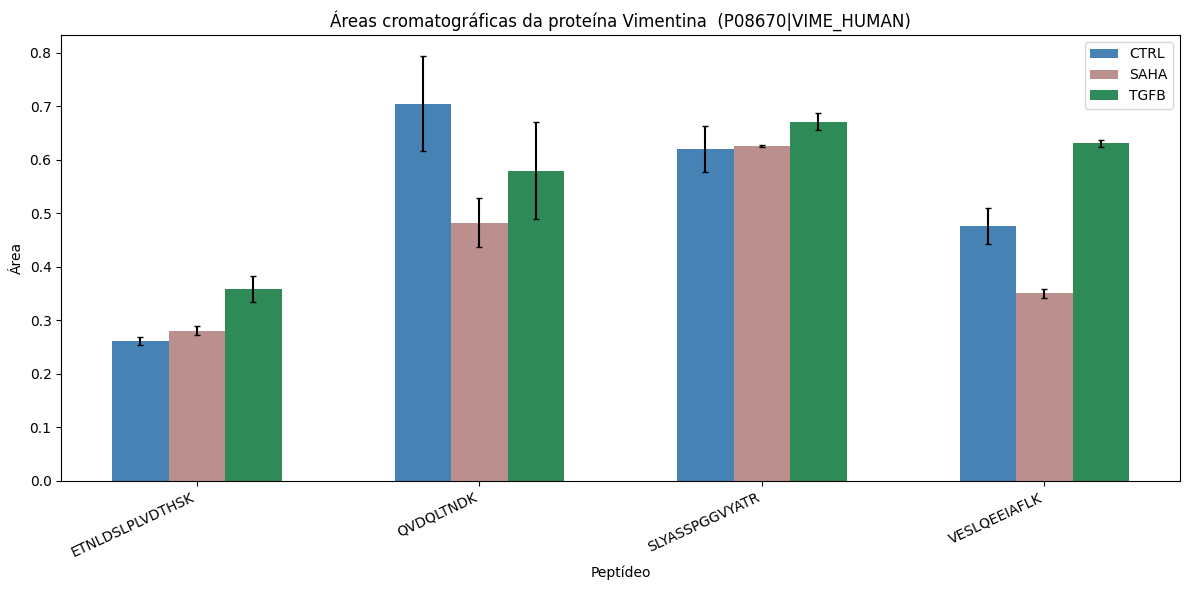

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados do Excel
file_path = 'Data/AreasRelatorioNorm.csv'
df = pd.read_csv(file_path, header=0)

# Garantir que as proteínas/peptídeos sejam colocados corretamente como índice
df.set_index('Protein_Peptide', inplace=True)

# Converter todos os dados para valores numéricos, se possível
df = df.apply(pd.to_numeric, errors='coerce')

# Filtrar apenas as proteínas/peptídeos começados 
df_filtered = df.filter(like='P08670|VIME_HUMAN', axis=0)

# Aplicar a transformação logarítmica (log + 1 para evitar valores negativos e zeros)
df_log = np.log1p(df_filtered[df_filtered > 0])

# Calcular a média e o desvio padrão para cada tratamento
df_log['CTRL_mean'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].mean(axis=1)
df_log['CTRL_std'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].std(axis=1)

df_log['SAHA_mean'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].mean(axis=1)
df_log['SAHA_std'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].std(axis=1)

df_log['TGFB_mean'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].mean(axis=1)
df_log['TGFB_std'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].std(axis=1)

# Criar o gráfico de colunas com barras de erro
labels = df_log.index
labels = [label.replace('P08670|VIME_HUMAN_', '').strip() for label in df_log.index]

x = np.arange(len(labels))  # Localização dos índices para os gráficos de colunas
width = 0.2  # Largura das colunas (ajustado para não sobrepor)

fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as colunas para cada tratamento com barra de erro (desvio padrão)
ax.bar(x - width, df_log['CTRL_mean'], width, yerr=df_log['CTRL_std'], label='CTRL', color='#4682B4', capsize=2)
ax.bar(x, df_log['SAHA_mean'], width, yerr=df_log['SAHA_std'], label='SAHA', color='#BC8F8F', capsize=2)
ax.bar(x + width, df_log['TGFB_mean'], width, yerr=df_log['TGFB_std'], label='TGFB', color='#2E8B57', capsize=2)

# Adicionar os rótulos e título
ax.set_xlabel('Peptídeo')
ax.set_ylabel('Área')
ax.set_title('Áreas cromatográficas da proteína Vimentina  (P08670|VIME_HUMAN)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=25, ha='right')  # Rotacionar um pouco menos os rótulos

# Adicionar legenda
ax.legend()

# Melhorar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


# VIMENTINA WITH T-TEST

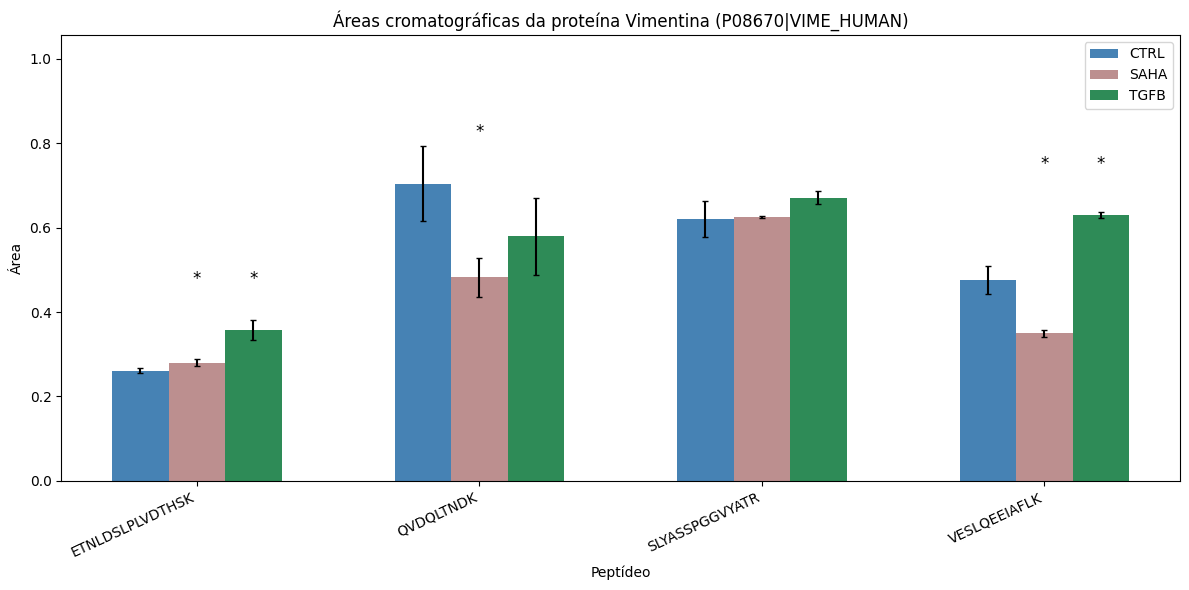

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Carregar dados do CSV
file_path = 'Data/AreasRelatorioNorm.csv'
df = pd.read_csv(file_path, header=0)

# Garantir que as proteínas/peptídeos sejam colocados corretamente como índice
df.set_index('Protein_Peptide', inplace=True)

# Converter todos os dados para valores numéricos, se possível
df = df.apply(pd.to_numeric, errors='coerce')

# Filtrar apenas as proteínas/peptídeos começados
df_filtered = df.filter(like='P08670|VIME_HUMAN', axis=0)

# Aplicar a transformação logarítmica (log + 1 para evitar valores negativos e zeros)
df_log = np.log1p(df_filtered[df_filtered > 0])

# Calcular a média e o desvio padrão para cada tratamento
df_log['CTRL_mean'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].mean(axis=1)
df_log['CTRL_std'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].std(axis=1)

df_log['SAHA_mean'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].mean(axis=1)
df_log['SAHA_std'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].std(axis=1)

df_log['TGFB_mean'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].mean(axis=1)
df_log['TGFB_std'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].std(axis=1)

# Realizar o teste t entre CTRL e SAHA, e entre CTRL e TGFB
p_values = []
for peptide in df_log.index:
    ctrl_values = df_log.loc[peptide, ['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']]
    saha_values = df_log.loc[peptide, ['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']]
    tgfb_values = df_log.loc[peptide, ['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']]
    
    # Teste t entre CTRL e SAHA
    t_stat, p_val_saha = ttest_ind(ctrl_values, saha_values, nan_policy='omit')
    # Teste t entre CTRL e TGFB
    t_stat, p_val_tgfb = ttest_ind(ctrl_values, tgfb_values, nan_policy='omit')
    
    # Adicionar p-values
    p_values.append((p_val_saha, p_val_tgfb))

# Criar o gráfico de colunas com barras de erro
labels = df_log.index
labels = [label.replace('P08670|VIME_HUMAN_', '').strip() for label in df_log.index]

x = np.arange(len(labels))  # Localização dos índices para os gráficos de colunas
width = 0.2  # Largura das colunas (ajustado para não sobrepor)

fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as colunas para cada tratamento com barra de erro (desvio padrão)
ax.bar(x - width, df_log['CTRL_mean'], width, yerr=df_log['CTRL_std'], label='CTRL', color='#4682B4', capsize=2)
ax.bar(x, df_log['SAHA_mean'], width, yerr=df_log['SAHA_std'], label='SAHA', color='#BC8F8F', capsize=2)
ax.bar(x + width, df_log['TGFB_mean'], width, yerr=df_log['TGFB_std'], label='TGFB', color='#2E8B57', capsize=2)

# Ajustar os limites do eixo y para dar espaço aos asteriscos
ax.set_ylim([0, df_log[['CTRL_mean', 'SAHA_mean', 'TGFB_mean']].max().max() * 1.5])

# Adicionar os rótulos e título
ax.set_xlabel('Peptídeo')
ax.set_ylabel('Área')
ax.set_title('Áreas cromatográficas da proteína Vimentina (P08670|VIME_HUMAN)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=25, ha='right')  # Rotacionar um pouco menos os rótulos

# Adicionar asteriscos para p-values significativos
for i, (p_val_saha, p_val_tgfb) in enumerate(p_values):
    y_max = max(df_log.loc[df_log.index[i], ['CTRL_mean', 'SAHA_mean', 'TGFB_mean']]) + 0.1  # Ajustar o espaço entre a barra e o asterisco
    if p_val_saha < 0.05:
        ax.text(x[i], y_max, '*', ha='center', va='bottom', color='black', fontsize=12)
    if p_val_tgfb < 0.05:
        ax.text(x[i] + width, y_max, '*', ha='center', va='bottom', color='black', fontsize=12)

# Adicionar legenda
ax.legend()

# Melhorar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


# UBA1 
Catalyzes the first step in ubiquitin conjugation to mark cellular proteins for degradation through the ubiquitin-proteasome system (PubMed:1447181, PubMed:1606621, PubMed:33108101).
Activates ubiquitin by first adenylating its C-terminal glycine residue with ATP, and thereafter linking this residue to the side chain of a cysteine residue in E1, yielding a ubiquitin-E1 thioester and free AMP (PubMed:1447181).
Essential for the formation of radiation-induced foci, timely DNA repair and for response to replication stress. Promotes the recruitment of TP53BP1 and BRCA1 at DNA damage sites (PubMed:22456334).

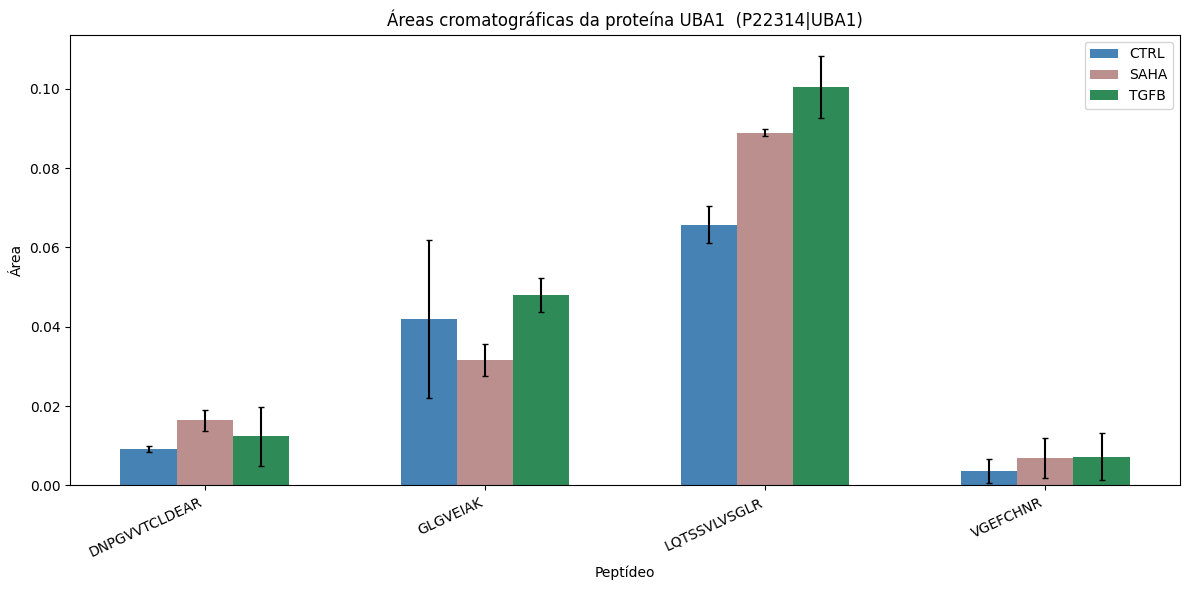

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados do Excel
file_path = 'Data/AreasRelatorioNorm.csv'
df = pd.read_csv(file_path, header=0)

# Garantir que as proteínas/peptídeos sejam colocados corretamente como índice
df.set_index('Protein_Peptide', inplace=True)

# Converter todos os dados para valores numéricos, se possível
df = df.apply(pd.to_numeric, errors='coerce')

# Filtrar apenas as proteínas/peptídeos começados 
df_filtered = df.filter(like='P22314|UBA1', axis=0)

# Aplicar a transformação logarítmica (log + 1 para evitar valores negativos e zeros)
df_log = np.log1p(df_filtered[df_filtered > 0])

# Calcular a média e o desvio padrão para cada tratamento
df_log['CTRL_mean'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].mean(axis=1)
df_log['CTRL_std'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].std(axis=1)

df_log['SAHA_mean'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].mean(axis=1)
df_log['SAHA_std'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].std(axis=1)

df_log['TGFB_mean'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].mean(axis=1)
df_log['TGFB_std'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].std(axis=1)

# Criar o gráfico de colunas com barras de erro
labels = df_log.index
labels = [label.replace('P22314|UBA1_HUMAN_', '').strip() for label in df_log.index]

x = np.arange(len(labels))  # Localização dos índices para os gráficos de colunas
width = 0.2  # Largura das colunas (ajustado para não sobrepor)

fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as colunas para cada tratamento com barra de erro (desvio padrão)
ax.bar(x - width, df_log['CTRL_mean'], width, yerr=df_log['CTRL_std'], label='CTRL', color='#4682B4', capsize=2)
ax.bar(x, df_log['SAHA_mean'], width, yerr=df_log['SAHA_std'], label='SAHA', color='#BC8F8F', capsize=2)
ax.bar(x + width, df_log['TGFB_mean'], width, yerr=df_log['TGFB_std'], label='TGFB', color='#2E8B57', capsize=2)

# Adicionar os rótulos e título
ax.set_xlabel('Peptídeo')
ax.set_ylabel('Área')
ax.set_title('Áreas cromatográficas da proteína UBA1  (P22314|UBA1)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=25, ha='right')  # Rotacionar um pouco menos os rótulos

# Adicionar legenda
ax.legend()

# Melhorar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


# UBA1 WITH T-TEST

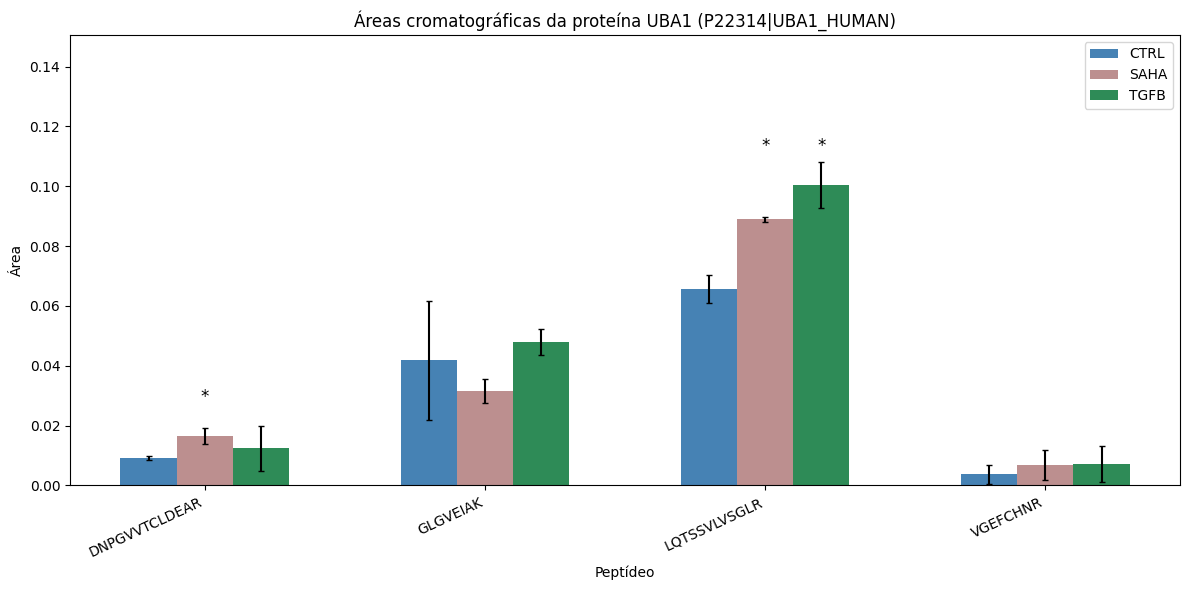

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Carregar dados do CSV
file_path = 'Data/AreasRelatorioNorm.csv'
df = pd.read_csv(file_path, header=0)

# Garantir que as proteínas/peptídeos sejam colocados corretamente como índice
df.set_index('Protein_Peptide', inplace=True)

# Converter todos os dados para valores numéricos, se possível
df = df.apply(pd.to_numeric, errors='coerce')

# Filtrar apenas as proteínas/peptídeos começados 
df_filtered = df.filter(like='P22314|UBA1_HUMAN', axis=0)

# Aplicar a transformação logarítmica (log + 1 para evitar valores negativos e zeros)
df_log = np.log1p(df_filtered[df_filtered > 0])

# Calcular a média e o desvio padrão para cada tratamento
df_log['CTRL_mean'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].mean(axis=1)
df_log['CTRL_std'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].std(axis=1)

df_log['SAHA_mean'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].mean(axis=1)
df_log['SAHA_std'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].std(axis=1)

df_log['TGFB_mean'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].mean(axis=1)
df_log['TGFB_std'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].std(axis=1)

# Realizar o teste t entre CTRL e SAHA, e entre CTRL e TGFB
p_values = []
for peptide in df_log.index:
    ctrl_values = df_log.loc[peptide, ['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']]
    saha_values = df_log.loc[peptide, ['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']]
    tgfb_values = df_log.loc[peptide, ['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']]
    
    # Teste t entre CTRL e SAHA
    t_stat, p_val_saha = ttest_ind(ctrl_values, saha_values, nan_policy='omit')
    # Teste t entre CTRL e TGFB
    t_stat, p_val_tgfb = ttest_ind(ctrl_values, tgfb_values, nan_policy='omit')
    
    # Adicionar p-values
    p_values.append((p_val_saha, p_val_tgfb))

# Criar o gráfico de colunas com barras de erro
labels = df_log.index
labels = [label.replace('P22314|UBA1_HUMAN_', '').strip() for label in df_log.index]

x = np.arange(len(labels))  # Localização dos índices para os gráficos de colunas
width = 0.2  # Largura das colunas (ajustado para não sobrepor)

fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as colunas para cada tratamento com barra de erro (desvio padrão)
ax.bar(x - width, df_log['CTRL_mean'], width, yerr=df_log['CTRL_std'], label='CTRL', color='#4682B4', capsize=2)
ax.bar(x, df_log['SAHA_mean'], width, yerr=df_log['SAHA_std'], label='SAHA', color='#BC8F8F', capsize=2)
ax.bar(x + width, df_log['TGFB_mean'], width, yerr=df_log['TGFB_std'], label='TGFB', color='#2E8B57', capsize=2)

# Ajustar os limites do eixo y para dar espaço aos asteriscos
ax.set_ylim([0, df_log[['CTRL_mean', 'SAHA_mean', 'TGFB_mean']].max().max() * 1.5])

# Adicionar os rótulos e título
ax.set_xlabel('Peptídeo')
ax.set_ylabel('Área')
ax.set_title('Áreas cromatográficas da proteína UBA1 (P22314|UBA1_HUMAN)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=25, ha='right')  # Rotacionar um pouco menos os rótulos

# Adicionar asteriscos para p-values significativos
for i, (p_val_saha, p_val_tgfb) in enumerate(p_values):
    y_max = max(df_log.loc[df_log.index[i], ['CTRL_mean', 'SAHA_mean', 'TGFB_mean']]) + 0.01  # Ajustar o espaço entre a barra e o asterisco
    if p_val_saha < 0.05:
        ax.text(x[i], y_max, '*', ha='center', va='bottom', color='black', fontsize=12)
    if p_val_tgfb < 0.05:
        ax.text(x[i] + width, y_max, '*', ha='center', va='bottom', color='black', fontsize=12)

# Adicionar legenda
ax.legend()

# Melhorar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


# USP5 

Cleaves linear and branched multiubiquitin polymers with a marked preference for branched polymers. Involved in unanchored 'Lys-48'-linked polyubiquitin disassembly. Binds linear and 'Lys-63'-linked polyubiquitin with a lower affinity. Knock-down of USP5 causes the accumulation of p53/TP53 and an increase in p53/TP53 transcriptional activity because the unanchored polyubiquitin that accumulates is able to compete with ubiquitinated p53/TP53 but not with MDM2 for proteasomal recognition.
Thiol-dependent hydrolysis of ester, thioester, amide, peptide and isopeptide bonds formed by the C-terminal Gly of ubiquitin (a 76-residue protein attached to proteins as an intracellular targeting signal).

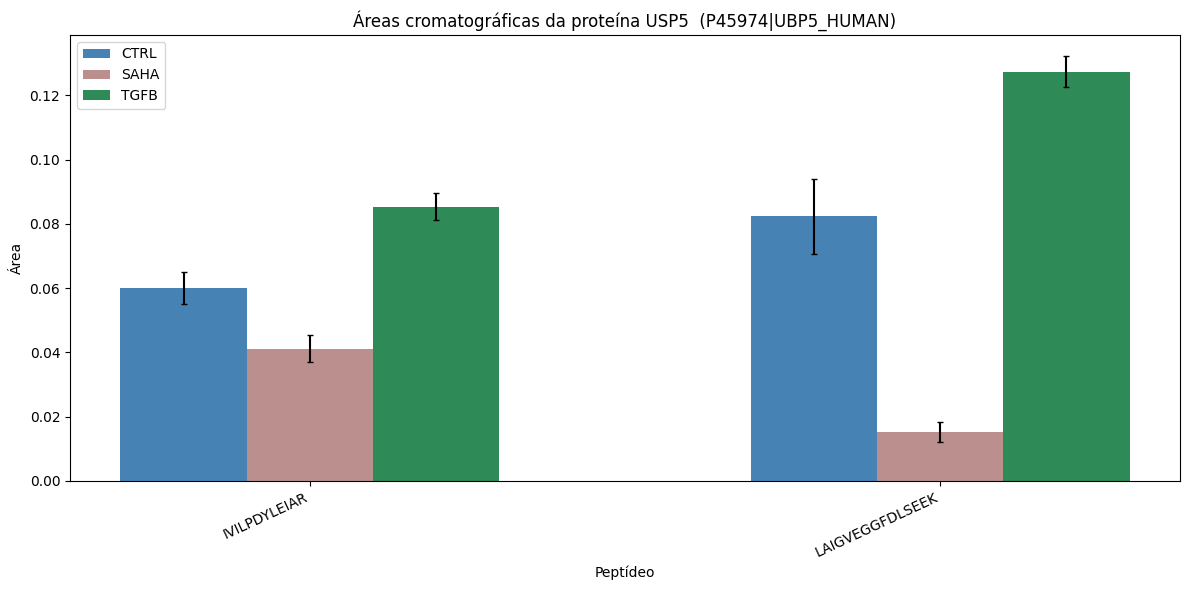

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados do Excel
file_path = 'Data/AreasRelatorioNorm.csv'
df = pd.read_csv(file_path, header=0)

# Garantir que as proteínas/peptídeos sejam colocados corretamente como índice
df.set_index('Protein_Peptide', inplace=True)

# Converter todos os dados para valores numéricos, se possível
df = df.apply(pd.to_numeric, errors='coerce')

# Filtrar apenas as proteínas/peptídeos começados 
df_filtered = df.filter(like='P45974|UBP5_HUMAN', axis=0)

# Aplicar a transformação logarítmica (log + 1 para evitar valores negativos e zeros)
df_log = np.log1p(df_filtered[df_filtered > 0])

# Calcular a média e o desvio padrão para cada tratamento
df_log['CTRL_mean'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].mean(axis=1)
df_log['CTRL_std'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].std(axis=1)

df_log['SAHA_mean'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].mean(axis=1)
df_log['SAHA_std'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].std(axis=1)

df_log['TGFB_mean'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].mean(axis=1)
df_log['TGFB_std'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].std(axis=1)

# Criar o gráfico de colunas com barras de erro
labels = df_log.index
labels = [label.replace('P45974|UBP5_HUMAN_', '').strip() for label in df_log.index]

x = np.arange(len(labels))  # Localização dos índices para os gráficos de colunas
width = 0.2  # Largura das colunas (ajustado para não sobrepor)

fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as colunas para cada tratamento com barra de erro (desvio padrão)
ax.bar(x - width, df_log['CTRL_mean'], width, yerr=df_log['CTRL_std'], label='CTRL', color='#4682B4', capsize=2)
ax.bar(x, df_log['SAHA_mean'], width, yerr=df_log['SAHA_std'], label='SAHA', color='#BC8F8F', capsize=2)
ax.bar(x + width, df_log['TGFB_mean'], width, yerr=df_log['TGFB_std'], label='TGFB', color='#2E8B57', capsize=2)

# Adicionar os rótulos e título
ax.set_xlabel('Peptídeo')
ax.set_ylabel('Área')
ax.set_title('Áreas cromatográficas da proteína USP5  (P45974|UBP5_HUMAN)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=25, ha='right')  # Rotacionar um pouco menos os rótulos

# Adicionar legenda
ax.legend()

# Melhorar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


# USP5 WITH T-TEST

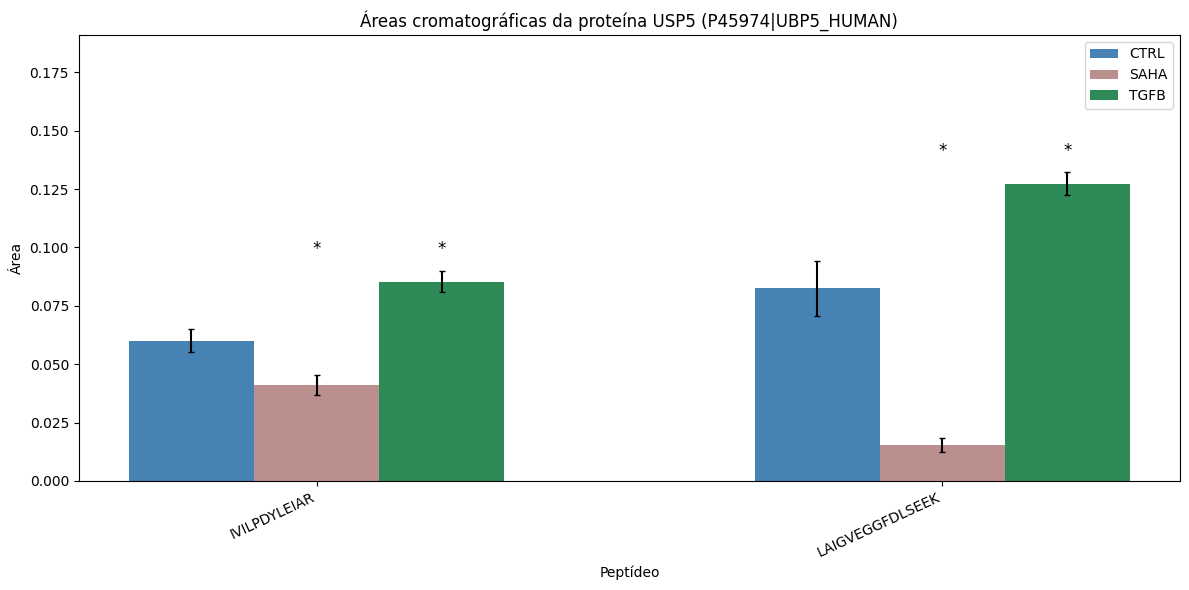

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Carregar dados do CSV
file_path = 'Data/AreasRelatorioNorm.csv'
df = pd.read_csv(file_path, header=0)

# Garantir que as proteínas/peptídeos sejam colocados corretamente como índice
df.set_index('Protein_Peptide', inplace=True)

# Converter todos os dados para valores numéricos, se possível
df = df.apply(pd.to_numeric, errors='coerce')

# Filtrar apenas as proteínas/peptídeos começados 
df_filtered = df.filter(like='P45974|UBP5_HUMAN', axis=0)

# Aplicar a transformação logarítmica (log + 1 para evitar valores negativos e zeros)
df_log = np.log1p(df_filtered[df_filtered > 0])

# Calcular a média e o desvio padrão para cada tratamento
df_log['CTRL_mean'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].mean(axis=1)
df_log['CTRL_std'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].std(axis=1)

df_log['SAHA_mean'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].mean(axis=1)
df_log['SAHA_std'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].std(axis=1)

df_log['TGFB_mean'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].mean(axis=1)
df_log['TGFB_std'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].std(axis=1)

# Realizar o teste t entre CTRL e SAHA, e entre CTRL e TGFB
p_values = []
for peptide in df_log.index:
    ctrl_values = df_log.loc[peptide, ['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']]
    saha_values = df_log.loc[peptide, ['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']]
    tgfb_values = df_log.loc[peptide, ['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']]
    
    # Teste t entre CTRL e SAHA
    t_stat, p_val_saha = ttest_ind(ctrl_values, saha_values, nan_policy='omit')
    # Teste t entre CTRL e TGFB
    t_stat, p_val_tgfb = ttest_ind(ctrl_values, tgfb_values, nan_policy='omit')
    
    # Adicionar p-values
    p_values.append((p_val_saha, p_val_tgfb))

# Criar o gráfico de colunas com barras de erro
labels = df_log.index
labels = [label.replace('P45974|UBP5_HUMAN_', '').strip() for label in df_log.index]

x = np.arange(len(labels))  # Localização dos índices para os gráficos de colunas
width = 0.2  # Largura das colunas (ajustado para não sobrepor)

fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as colunas para cada tratamento com barra de erro (desvio padrão)
ax.bar(x - width, df_log['CTRL_mean'], width, yerr=df_log['CTRL_std'], label='CTRL', color='#4682B4', capsize=2)
ax.bar(x, df_log['SAHA_mean'], width, yerr=df_log['SAHA_std'], label='SAHA', color='#BC8F8F', capsize=2)
ax.bar(x + width, df_log['TGFB_mean'], width, yerr=df_log['TGFB_std'], label='TGFB', color='#2E8B57', capsize=2)

# Ajustar os limites do eixo y para dar espaço aos asteriscos
ax.set_ylim([0, df_log[['CTRL_mean', 'SAHA_mean', 'TGFB_mean']].max().max() * 1.5])

# Adicionar os rótulos e título
ax.set_xlabel('Peptídeo')
ax.set_ylabel('Área')
ax.set_title('Áreas cromatográficas da proteína USP5 (P45974|UBP5_HUMAN)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=25, ha='right')  # Rotacionar um pouco menos os rótulos

# Adicionar asteriscos para p-values significativos
for i, (p_val_saha, p_val_tgfb) in enumerate(p_values):
    y_max = max(df_log.loc[df_log.index[i], ['CTRL_mean', 'SAHA_mean', 'TGFB_mean']]) + 0.01  # Ajustar o espaço entre a barra e o asterisco
    if p_val_saha < 0.05:
        ax.text(x[i], y_max, '*', ha='center', va='bottom', color='black', fontsize=12)
    if p_val_tgfb < 0.05:
        ax.text(x[i] + width, y_max, '*', ha='center', va='bottom', color='black', fontsize=12)

# Adicionar legenda
ax.legend()

# Melhorar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


# USP7 

Hydrolase that deubiquitinates target proteins such as FOXO4, DEPTOR, KAT5, p53/TP53, MDM2, ERCC6, DNMT1, UHRF1, PTEN, KMT2E/MLL5 and DAXX (PubMed:11923872, PubMed:15053880, PubMed:16964248, PubMed:18716620, PubMed:25283148, PubMed:25865756, PubMed:26678539, PubMed:28655758, PubMed:35216969).
Together with DAXX, prevents MDM2 self-ubiquitination and enhances the E3 ligase activity of MDM2 towards p53/TP53, thereby promoting p53/TP53 ubiquitination and proteasomal degradation (PubMed:15053880, PubMed:16845383, PubMed:18566590, PubMed:20153724).
Deubiquitinates p53/TP53, preventing degradation of p53/TP53, and enhances p53/TP53-dependent transcription regulation, cell growth repression and apoptosis (PubMed:25283148).
Deubiquitinates p53/TP53 and MDM2 and strongly stabilizes p53/TP53 even in the presence of excess MDM2, and also induces p53/TP53-dependent cell growth repression and apoptosis (PubMed:11923872, PubMed:26786098).
Deubiquitination of FOXO4 in presence of hydrogen peroxide is not dependent on p53/TP53 and inhibits FOXO4-induced transcriptional activity (PubMed:16964248).

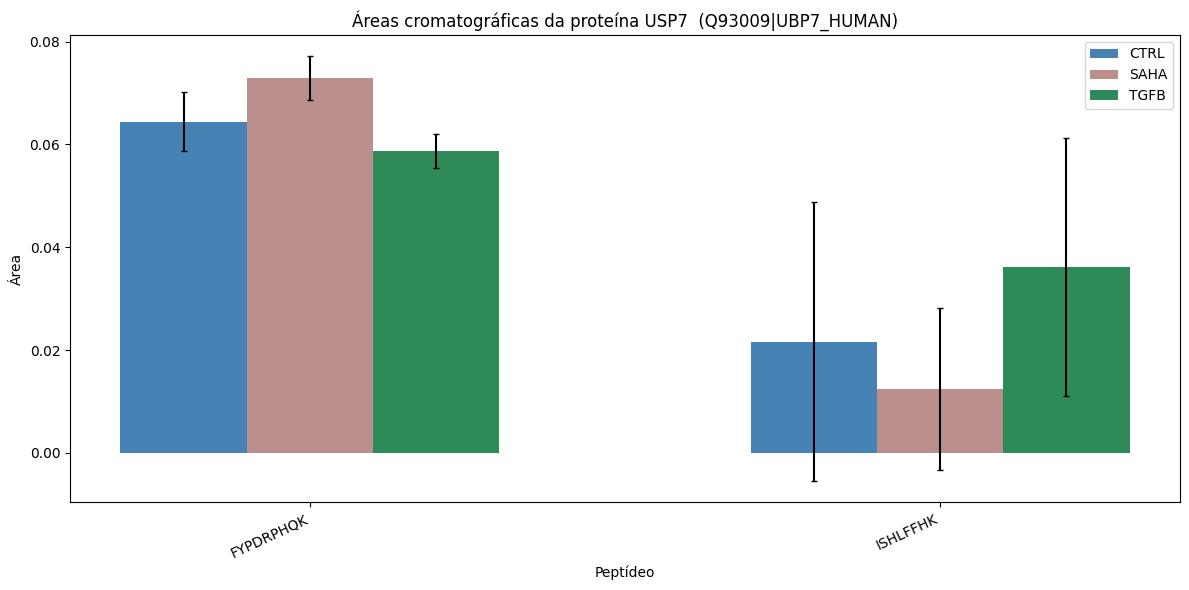

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados do Excel
file_path = 'Data/AreasRelatorioNorm.csv'
df = pd.read_csv(file_path, header=0)

# Garantir que as proteínas/peptídeos sejam colocados corretamente como índice
df.set_index('Protein_Peptide', inplace=True)

# Converter todos os dados para valores numéricos, se possível
df = df.apply(pd.to_numeric, errors='coerce')

# Filtrar apenas as proteínas/peptídeos começados 
df_filtered = df.filter(like='Q93009|UBP7_HUMAN', axis=0)

# Aplicar a transformação logarítmica (log + 1 para evitar valores negativos e zeros)
df_log = np.log1p(df_filtered[df_filtered > 0])

# Calcular a média e o desvio padrão para cada tratamento
df_log['CTRL_mean'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].mean(axis=1)
df_log['CTRL_std'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].std(axis=1)

df_log['SAHA_mean'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].mean(axis=1)
df_log['SAHA_std'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].std(axis=1)

df_log['TGFB_mean'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].mean(axis=1)
df_log['TGFB_std'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].std(axis=1)

# Criar o gráfico de colunas com barras de erro
labels = df_log.index
labels = [label.replace('Q93009|UBP7_HUMAN_', '').strip() for label in df_log.index]

x = np.arange(len(labels))  # Localização dos índices para os gráficos de colunas
width = 0.2  # Largura das colunas (ajustado para não sobrepor)

fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as colunas para cada tratamento com barra de erro (desvio padrão)
ax.bar(x - width, df_log['CTRL_mean'], width, yerr=df_log['CTRL_std'], label='CTRL', color='#4682B4', capsize=2)
ax.bar(x, df_log['SAHA_mean'], width, yerr=df_log['SAHA_std'], label='SAHA', color='#BC8F8F', capsize=2)
ax.bar(x + width, df_log['TGFB_mean'], width, yerr=df_log['TGFB_std'], label='TGFB', color='#2E8B57', capsize=2)

# Adicionar os rótulos e título
ax.set_xlabel('Peptídeo')
ax.set_ylabel('Área')
ax.set_title('Áreas cromatográficas da proteína USP7  (Q93009|UBP7_HUMAN)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=25, ha='right')  # Rotacionar um pouco menos os rótulos

# Adicionar legenda
ax.legend()

# Melhorar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# USP7 with T-TEST

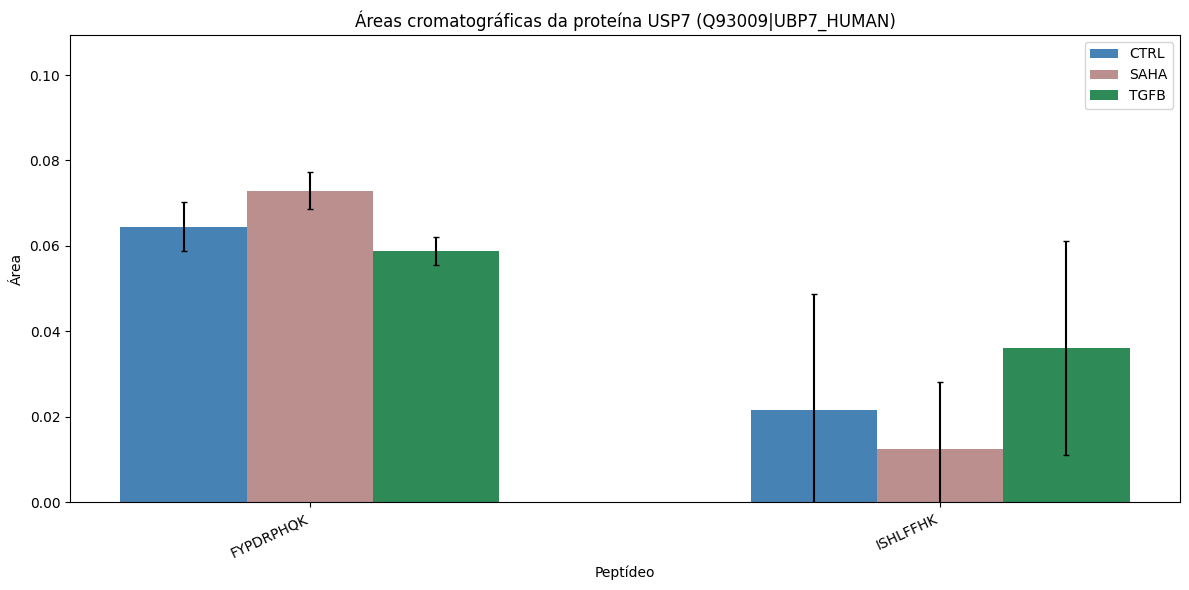

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Carregar dados do CSV
file_path = 'Data/AreasRelatorioNorm.csv'
df = pd.read_csv(file_path, header=0)

# Garantir que as proteínas/peptídeos sejam colocados corretamente como índice
df.set_index('Protein_Peptide', inplace=True)

# Converter todos os dados para valores numéricos, se possível
df = df.apply(pd.to_numeric, errors='coerce')

# Filtrar apenas as proteínas/peptídeos começados 
df_filtered = df.filter(like='Q93009|UBP7_HUMAN', axis=0)

# Aplicar a transformação logarítmica (log + 1 para evitar valores negativos e zeros)
df_log = np.log1p(df_filtered[df_filtered > 0])

# Calcular a média e o desvio padrão para cada tratamento
df_log['CTRL_mean'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].mean(axis=1)
df_log['CTRL_std'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].std(axis=1)

df_log['SAHA_mean'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].mean(axis=1)
df_log['SAHA_std'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].std(axis=1)

df_log['TGFB_mean'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].mean(axis=1)
df_log['TGFB_std'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].std(axis=1)

# Realizar o teste t entre CTRL e SAHA, e entre CTRL e TGFB
p_values = []
for peptide in df_log.index:
    ctrl_values = df_log.loc[peptide, ['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']]
    saha_values = df_log.loc[peptide, ['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']]
    tgfb_values = df_log.loc[peptide, ['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']]
    
    # Teste t entre CTRL e SAHA
    t_stat, p_val_saha = ttest_ind(ctrl_values, saha_values, nan_policy='omit')
    # Teste t entre CTRL e TGFB
    t_stat, p_val_tgfb = ttest_ind(ctrl_values, tgfb_values, nan_policy='omit')
    
    # Adicionar p-values
    p_values.append((p_val_saha, p_val_tgfb))

# Criar o gráfico de colunas com barras de erro
labels = df_log.index
labels = [label.replace('Q93009|UBP7_HUMAN_', '').strip() for label in df_log.index]

x = np.arange(len(labels))  # Localização dos índices para os gráficos de colunas
width = 0.2  # Largura das colunas (ajustado para não sobrepor)

fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as colunas para cada tratamento com barra de erro (desvio padrão)
ax.bar(x - width, df_log['CTRL_mean'], width, yerr=df_log['CTRL_std'], label='CTRL', color='#4682B4', capsize=2)
ax.bar(x, df_log['SAHA_mean'], width, yerr=df_log['SAHA_std'], label='SAHA', color='#BC8F8F', capsize=2)
ax.bar(x + width, df_log['TGFB_mean'], width, yerr=df_log['TGFB_std'], label='TGFB', color='#2E8B57', capsize=2)

# Ajustar os limites do eixo y para dar espaço aos asteriscos
ax.set_ylim([0, df_log[['CTRL_mean', 'SAHA_mean', 'TGFB_mean']].max().max() * 1.5])

# Adicionar os rótulos e título
ax.set_xlabel('Peptídeo')
ax.set_ylabel('Área')
ax.set_title('Áreas cromatográficas da proteína USP7 (Q93009|UBP7_HUMAN)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=25, ha='right')  # Rotacionar um pouco menos os rótulos

# Adicionar asteriscos para p-values significativos
for i, (p_val_saha, p_val_tgfb) in enumerate(p_values):
    y_max = max(df_log.loc[df_log.index[i], ['CTRL_mean', 'SAHA_mean', 'TGFB_mean']]) + 0.01  # Ajustar o espaço entre a barra e o asterisco
    if p_val_saha < 0.05:
        ax.text(x[i], y_max, '*', ha='center', va='bottom', color='black', fontsize=12)
    if p_val_tgfb < 0.05:
        ax.text(x[i] + width, y_max, '*', ha='center', va='bottom', color='black', fontsize=12)

# Adicionar legenda
ax.legend()

# Melhorar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


# RS27A
Exists either covalently attached to another protein, or free (unanchored). When covalently bound, it is conjugated to target proteins via an isopeptide bond either as a monomer (monoubiquitin), a polymer linked via different Lys residues of the ubiquitin (polyubiquitin chains) or a linear polymer linked via the initiator Met of the ubiquitin (linear polyubiquitin chains). Polyubiquitin chains, when attached to a target protein, have different functions depending on the Lys residue of the ubiquitin that is linked: Lys-6-linked may be involved in DNA repair; Lys-11-linked is involved in ERAD (endoplasmic reticulum-associated degradation) and in cell-cycle regulation; Lys-29-linked is involved in proteotoxic stress response and cell cycle; Lys-33-linked is involved in kinase modification; Lys-48-linked is involved in protein degradation via the proteasome; Lys-63-linked is involved in endocytosis, DNA-damage responses as well as in signaling processes leading to activation of the transcription factor NF-kappa-B. Linear polymer chains formed via attachment by the initiator Met lead to cell signaling. Ubiquitin is usually conjugated to Lys residues of target proteins, however, in rare cases, conjugation to Cys or Ser residues has been observed. When polyubiquitin is free (unanchored-polyubiquitin), it also has distinct roles, such as in activation of protein kinases, and in signaling.2 Publications1 Publication
Small ribosomal subunit protein eS31
Component of the 40S subunit of the ribosome (PubMed:23636399, PubMed:9582194).
Part of the small subunit (SSU) processome, first precursor of the small eukaryotic ribosomal subunit. During the assembly of the SSU processome in the nucleolus, many ribosome biogenesis factors, an RNA chaperone and ribosomal proteins associate with the nascent pre-rRNA and work in concert to generate RNA folding, modifications, rearrangements and cleavage as well as targeted degradation of pre-ribosomal RNA by the RNA exosome (PubMed:23636399, PubMed:34516797).

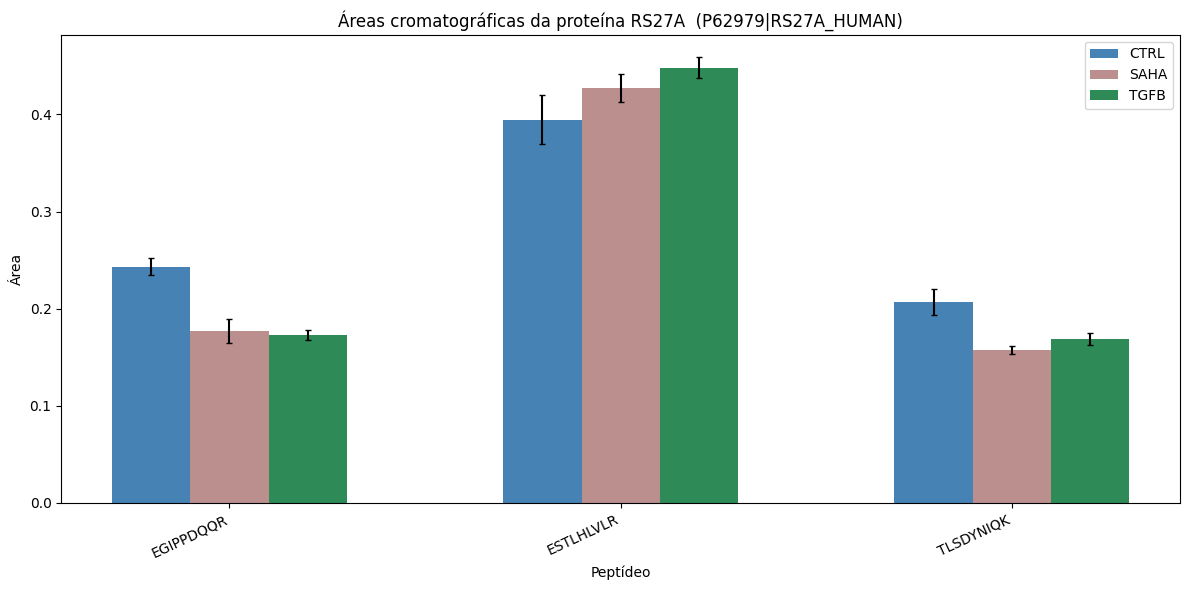

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados do Excel
file_path = 'Data/AreasRelatorioNorm.csv'
df = pd.read_csv(file_path, header=0)

# Garantir que as proteínas/peptídeos sejam colocados corretamente como índice
df.set_index('Protein_Peptide', inplace=True)

# Converter todos os dados para valores numéricos, se possível
df = df.apply(pd.to_numeric, errors='coerce')

# Filtrar apenas as proteínas/peptídeos começados 
df_filtered = df.filter(like='P62979|RS27A_HUMAN', axis=0)

# Aplicar a transformação logarítmica (log + 1 para evitar valores negativos e zeros)
df_log = np.log1p(df_filtered[df_filtered > 0])

# Calcular a média e o desvio padrão para cada tratamento
df_log['CTRL_mean'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].mean(axis=1)
df_log['CTRL_std'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].std(axis=1)

df_log['SAHA_mean'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].mean(axis=1)
df_log['SAHA_std'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].std(axis=1)

df_log['TGFB_mean'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].mean(axis=1)
df_log['TGFB_std'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].std(axis=1)

# Criar o gráfico de colunas com barras de erro
labels = df_log.index
labels = [label.replace('P62979|RS27A_HUMAN_', '').strip() for label in df_log.index]

x = np.arange(len(labels))  # Localização dos índices para os gráficos de colunas
width = 0.2  # Largura das colunas (ajustado para não sobrepor)

fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as colunas para cada tratamento com barra de erro (desvio padrão)
ax.bar(x - width, df_log['CTRL_mean'], width, yerr=df_log['CTRL_std'], label='CTRL', color='#4682B4', capsize=2)
ax.bar(x, df_log['SAHA_mean'], width, yerr=df_log['SAHA_std'], label='SAHA', color='#BC8F8F', capsize=2)
ax.bar(x + width, df_log['TGFB_mean'], width, yerr=df_log['TGFB_std'], label='TGFB', color='#2E8B57', capsize=2)

# Adicionar os rótulos e título
ax.set_xlabel('Peptídeo')
ax.set_ylabel('Área')
ax.set_title('Áreas cromatográficas da proteína RS27A  (P62979|RS27A_HUMAN)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=25, ha='right')  # Rotacionar um pouco menos os rótulos

# Adicionar legenda
ax.legend()

# Melhorar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# RS27A WITH T-TEST

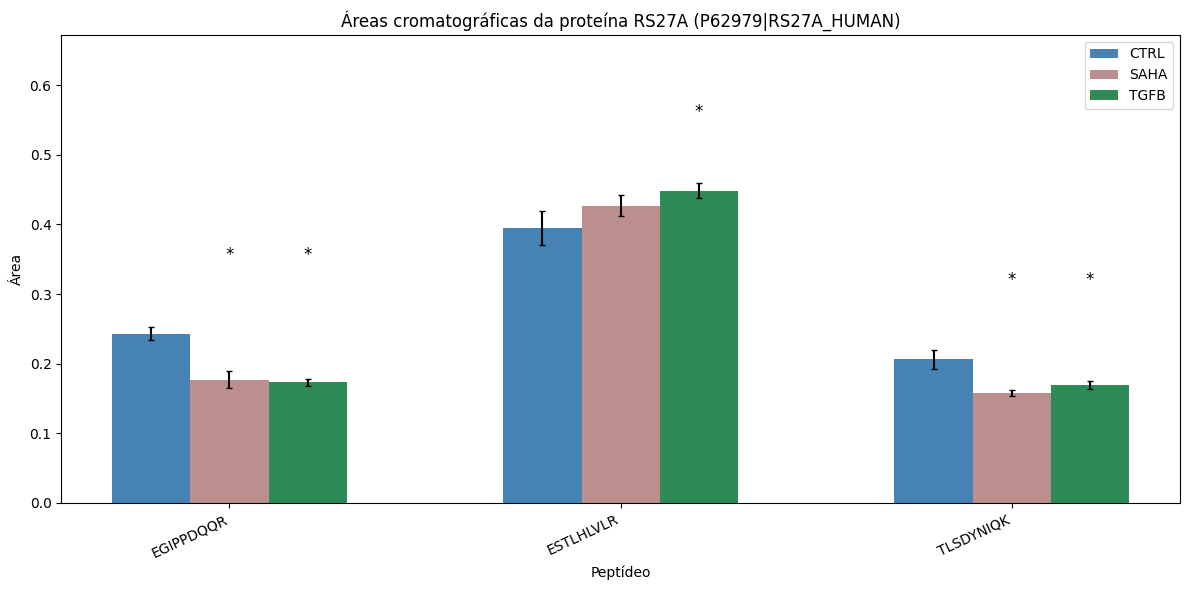

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Carregar dados do CSV
file_path = 'Data/AreasRelatorioNorm.csv'
df = pd.read_csv(file_path, header=0)

# Garantir que as proteínas/peptídeos sejam colocados corretamente como índice
df.set_index('Protein_Peptide', inplace=True)

# Converter todos os dados para valores numéricos, se possível
df = df.apply(pd.to_numeric, errors='coerce')

# Filtrar apenas as proteínas/peptídeos começados 
df_filtered = df.filter(like='P62979|RS27A_HUMAN', axis=0)

# Aplicar a transformação logarítmica (log + 1 para evitar valores negativos e zeros)
df_log = np.log1p(df_filtered[df_filtered > 0])

# Calcular a média e o desvio padrão para cada tratamento
df_log['CTRL_mean'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].mean(axis=1)
df_log['CTRL_std'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].std(axis=1)

df_log['SAHA_mean'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].mean(axis=1)
df_log['SAHA_std'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].std(axis=1)

df_log['TGFB_mean'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].mean(axis=1)
df_log['TGFB_std'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].std(axis=1)

# Realizar o teste t entre CTRL e SAHA, e entre CTRL e TGFB
p_values = []
for peptide in df_log.index:
    ctrl_values = df_log.loc[peptide, ['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']]
    saha_values = df_log.loc[peptide, ['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']]
    tgfb_values = df_log.loc[peptide, ['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']]
    
    # Teste t entre CTRL e SAHA
    t_stat, p_val_saha = ttest_ind(ctrl_values, saha_values, nan_policy='omit')
    # Teste t entre CTRL e TGFB
    t_stat, p_val_tgfb = ttest_ind(ctrl_values, tgfb_values, nan_policy='omit')
    
    # Adicionar p-values
    p_values.append((p_val_saha, p_val_tgfb))

# Criar o gráfico de colunas com barras de erro
labels = df_log.index
labels = [label.replace('P62979|RS27A_HUMAN_', '').strip() for label in df_log.index]

x = np.arange(len(labels))  # Localização dos índices para os gráficos de colunas
width = 0.2  # Largura das colunas (ajustado para não sobrepor)

fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as colunas para cada tratamento com barra de erro (desvio padrão)
ax.bar(x - width, df_log['CTRL_mean'], width, yerr=df_log['CTRL_std'], label='CTRL', color='#4682B4', capsize=2)
ax.bar(x, df_log['SAHA_mean'], width, yerr=df_log['SAHA_std'], label='SAHA', color='#BC8F8F', capsize=2)
ax.bar(x + width, df_log['TGFB_mean'], width, yerr=df_log['TGFB_std'], label='TGFB', color='#2E8B57', capsize=2)

# Ajustar os limites do eixo y para dar espaço aos asteriscos
ax.set_ylim([0, df_log[['CTRL_mean', 'SAHA_mean', 'TGFB_mean']].max().max() * 1.5])

# Adicionar os rótulos e título
ax.set_xlabel('Peptídeo')
ax.set_ylabel('Área')
ax.set_title('Áreas cromatográficas da proteína RS27A (P62979|RS27A_HUMAN)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=25, ha='right')  # Rotacionar um pouco menos os rótulos

# Adicionar asteriscos para p-values significativos
for i, (p_val_saha, p_val_tgfb) in enumerate(p_values):
    y_max = max(df_log.loc[df_log.index[i], ['CTRL_mean', 'SAHA_mean', 'TGFB_mean']]) + 0.1  # Ajustar o espaço entre a barra e o asterisco
    if p_val_saha < 0.05:
        ax.text(x[i], y_max, '*', ha='center', va='bottom', color='black', fontsize=12)
    if p_val_tgfb < 0.05:
        ax.text(x[i] + width, y_max, '*', ha='center', va='bottom', color='black', fontsize=12)

# Adicionar legenda
ax.legend()

# Melhorar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()
